In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler, OneHotEncoder
from sklearn.compose import ColumnTransformer
from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import RandomForestClassifier
from sklearn.svm import SVC
from sklearn.tree import DecisionTreeClassifier
from sklearn.metrics import classification_report, roc_auc_score, roc_curve
import joblib
import catboost

### Data Loading

In [3]:
laptop_df = pd.read_csv("Laptop_log_data.csv")
server_df = pd.read_csv("Server_log_data.csv")

In [4]:
laptop_df

,Laptop ID,Laptop Model,Laptop Status,Fan Faulty,Disk Usage (%),CPU Usage (%),Memory Usage (%),Manufacturer,Processor Type,Screen Size (inch),Battery Capacity (Wh),Number of USB Ports,Graphics Card,Bluetooth,Wi-Fi,Touch Screen,Weight (kg),Target
0,c37dae4b-bfcc-43cf-938a-e9218ec74516,Laptop Model A,Active,0,30.06,88.35,69.38,HP,AMD Ryzen 7,17,50,2,NVIDIA GeForce GTX 1650,Yes,Yes,Yes,2.08,1
1,1b9466f3-98a0-45dd-be28-eddf9f88697f,Laptop Model C,Active,1,30.13,34.49,63.68,Dell,AMD Ryzen 7,15,50,3,Integrated Graphics,No,No,Yes,1.51,1
2,5975b995-397a-4d93-8727-70f54ebaf4b5,Laptop Model A,Offline,0,14.19,59.40,29.52,Asus,Intel Core i7,15,50,3,Integrated Graphics,Yes,Yes,Yes,1.35,0
3,a8c99c95-f8f3-4869-8c70-34f6e2918a0e,Laptop Model A,Offline,0,58.38,33.90,43.29,Lenovo,AMD Ryzen 7,17,40,2,Integrated Graphics,Yes,No,No,1.94,0
4,3cca0c5d-48c2-4cd8-be6a-7a80f6336e79,Laptop Model B,Offline,0,35.19,88.46,32.31,Asus,Intel Core i7,14,60,3,NVIDIA GeForce GTX 1650,No,Yes,Yes,1.44,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
14995,024d2d58-9fc4-48a3-bb87-f118cedfa91e,Laptop Model A,Active,1,88.21,72.17,23.56,Asus,AMD Ryzen 7,17,50,4,NVIDIA GeForce GTX 1650,No,Yes,Yes,2.06,1
14996,0b24b3dc-84a8-4870-a1fa-9643ecdda596,Laptop Model A,Active,1,83.24,10.66,39.73,HP,Intel Core i7,14,40,3,Integrated Graphics,No,No,Yes,1.27,1
14997,4aa77a89-fdd0-4fbc-b443-0b31192bfa95,Laptop Model A,Active,0,86.26,47.39,82.06,Dell,Intel Core i5,17,60,4,NVIDIA GeForce GTX 1650,No,Yes,Yes,1.39,1
14998,18820c8b-2d94-4503-b927-5472a46c8788,Laptop Model C,Active,0,56.30,40.12,29.07,HP,Intel Core i7,17,40,4,NVIDIA GeForce GTX 1650,No,Yes,Yes,1.42,0


In [5]:
server_df

,Server ID,Server Name,Server Status,Disk Usage (%),CPU Usage (%),Memory Usage (%),Operating System,Number of CPU Cores,RAM Capacity (GB),Network Traffic (Mbps),Disk I/O (IOPS),Server Location,Server Uptime (days),Target
0,0560324d-9473-4601-9c36-663d91b1cc52,Server C,Offline,93.05,11.51,56.95,Linux,16,16,40.37,26.64,Data Center,230,1
1,b8baa62c-68d9-4257-9fd2-679ead3de617,Server C,Offline,70.71,52.34,80.44,Windows Server,6,64,35.32,69.85,Office,146,0
2,f240e773-15a5-4688-af7c-5b68aff2e679,Server A,Offline,45.90,36.88,90.65,Ubuntu Server,16,8,22.32,16.49,Office,136,1
3,a6d5bf90-c43f-40c8-929e-a27f34f3d20f,Server A,Online,33.50,13.56,64.80,Linux,8,8,98.19,75.33,Office,140,1
4,c3fea11b-838c-4316-9203-e088b6768555,Server C,Online,82.50,24.92,80.64,Windows Server,8,8,38.75,52.07,Data Center,338,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
14995,979bd5b3-36f6-42f0-ae59-bb2afe8b1725,Server C,Online,94.76,10.03,80.42,Windows Server,6,16,36.25,67.38,Data Center,212,1
14996,afb197b1-304b-4d00-8fa2-85869211355a,Server A,Offline,58.87,89.36,77.66,Windows Server,4,8,10.75,37.87,Data Center,341,1
14997,a1bc98b2-07db-4eda-8c49-a1f997d751c2,Server C,Online,89.15,15.73,61.71,Linux,4,8,75.45,83.26,Office,297,1
14998,da04ac97-3b2d-43e7-9356-da8402d9211f,Server C,Online,44.13,52.45,68.23,Ubuntu Server,4,16,13.18,64.57,Office,276,1


In [6]:
server_df.columns

Index(['Server ID', 'Server Name', 'Server Status', 'Disk Usage (%)',
       'CPU Usage (%)', 'Memory Usage (%)', 'Operating System',
       'Number of CPU Cores', 'RAM Capacity (GB)', 'Network Traffic (Mbps)',
       'Disk I/O (IOPS)', 'Server Location', 'Server Uptime (days)', 'Target'],
      dtype='object')

In [7]:
for column in server_df.columns[1:]:
    if server_df[column].dtype == 'object':
        unique = server_df[column].unique()
        print(f"unique variables in {column} are: {unique}")
    else:
        small = server_df[column].min()
        big = server_df[column].max()
        print(f"The values in {column} are in the range {small} - {big}")

unique variables in Server Name are: ['Server C' 'Server A' 'Server B']
unique variables in Server Status are: ['Offline' 'Online']
The values in Disk Usage (%) are in the range 10.01 - 94.99
The values in CPU Usage (%) are in the range 10.01 - 94.99
The values in Memory Usage (%) are in the range 10.0 - 95.0
unique variables in Operating System are: ['Linux' 'Windows Server' 'Ubuntu Server']
The values in Number of CPU Cores are in the range 4 - 16
The values in RAM Capacity (GB) are in the range 8 - 64
The values in Network Traffic (Mbps) are in the range 10.0 - 100.0
The values in Disk I/O (IOPS) are in the range 10.0 - 99.97
unique variables in Server Location are: ['Data Center' 'Office']
The values in Server Uptime (days) are in the range 1 - 365
The values in Target are in the range 0 - 1


In [8]:
laptop_df.columns

Index(['Laptop ID', 'Laptop Model', 'Laptop Status', 'Fan Faulty',
       'Disk Usage (%)', 'CPU Usage (%)', 'Memory Usage (%)', 'Manufacturer',
       'Processor Type', 'Screen Size (inch)', 'Battery Capacity (Wh)',
       'Number of USB Ports', 'Graphics Card', 'Bluetooth', 'Wi-Fi',
       'Touch Screen', 'Weight (kg)', 'Target'],
      dtype='object')

In [9]:
for column in laptop_df.columns[1:]:
    if laptop_df[column].dtype == 'object':
        unique = laptop_df[column].unique()
        print(f"unique variables in {column} are: {unique}")
    else:
        small = laptop_df[column].min()
        big = laptop_df[column].max()
        print(f"The values in {column} are in the range {small} - {big}")

unique variables in Laptop Model are: ['Laptop Model A' 'Laptop Model C' 'Laptop Model B']
unique variables in Laptop Status are: ['Active' 'Offline']
The values in Fan Faulty are in the range 0 - 1
The values in Disk Usage (%) are in the range 10.01 - 95.0
The values in CPU Usage (%) are in the range 10.01 - 95.0
The values in Memory Usage (%) are in the range 10.0 - 95.0
unique variables in Manufacturer are: ['HP' 'Dell' 'Asus' 'Lenovo']
unique variables in Processor Type are: ['AMD Ryzen 7' 'Intel Core i7' 'Intel Core i5']
The values in Screen Size (inch) are in the range 13 - 17
The values in Battery Capacity (Wh) are in the range 40 - 70
The values in Number of USB Ports are in the range 2 - 4
unique variables in Graphics Card are: ['NVIDIA GeForce GTX 1650' 'Integrated Graphics']
unique variables in Bluetooth are: ['Yes' 'No']
unique variables in Wi-Fi are: ['Yes' 'No']
unique variables in Touch Screen are: ['Yes' 'No']
The values in Weight (kg) are in the range 1.0 - 2.5
The val

## Data Preprocessing

In [10]:
# Preprocessing pipeline for Scenario 1 (Laptops)
def preprocess_laptop_data(df):
    # Select features and target variable
    X = df.drop(columns=['Laptop ID', 'Target'])
    y = df['Target']

    # Encode categorical variables (Laptop Model, Laptop Status, Manufacturer, Processor Type, Graphics Card, Bluetooth, Wi-Fi, Touch Screen)
    categorical_features = ['Laptop Model', 'Laptop Status', 'Manufacturer', 'Processor Type', 'Graphics Card', 'Bluetooth', 'Wi-Fi', 'Touch Screen']
    categorical_transformer = OneHotEncoder(drop='first')

    # Scale numerical features (Disk Usage (%), CPU Usage (%), Memory Usage (%), Screen Size (inch), Battery Capacity (Wh), Number of USB Ports, Weight (kg))
    numerical_features = ['Disk Usage (%)', 'CPU Usage (%)', 'Memory Usage (%)', 'Screen Size (inch)', 'Battery Capacity (Wh)', 'Number of USB Ports', 'Weight (kg)']
    numerical_transformer = StandardScaler()

    # Combine the transformations
    preprocessor = ColumnTransformer(
        transformers=[
            ('cat', categorical_transformer, categorical_features),
            ('num', numerical_transformer, numerical_features)
        ])
    
    # Apply preprocessing to the data
    X_preprocessed = preprocessor.fit_transform(X)

    # save the preprocessor
    joblib.dump(preprocessor, 'laptop_preprocessor_pipeline.joblib')

    # Split the data into training and testing sets
    X_train, X_test, y_train, y_test = train_test_split(X_preprocessed, y, test_size=0.2, random_state=42)

    return X_train, X_test, y_train, y_test


In [11]:
# Preprocessing pipeline for Scenario 2 (Servers)
def preprocess_server_data(df):
    # Select features and target variable
    X = df.drop(columns=['Server ID', 'Server Name', 'Target'])
    y = df['Target']

    # Encode categorical variables (Server Status, Operating System, Server Location)
    categorical_features = ['Server Status', 'Operating System', 'Server Location']
    categorical_transformer = OneHotEncoder(drop='first')

    # Scale numerical features (Disk Usage (%), CPU Usage (%), Memory Usage (%), Number of CPU Cores, RAM Capacity (GB), Network Traffic (Mbps), Disk I/O (IOPS), Server Uptime (days))
    numerical_features = ['Disk Usage (%)', 'CPU Usage (%)', 'Memory Usage (%)', 'Number of CPU Cores', 'RAM Capacity (GB)', 'Network Traffic (Mbps)', 'Disk I/O (IOPS)', 'Server Uptime (days)']
    numerical_transformer = StandardScaler()

    # Combine the transformations
    preprocessor = ColumnTransformer(
        transformers=[
            ('cat', categorical_transformer, categorical_features),
            ('num', numerical_transformer, numerical_features)
        ])
    
    # Apply preprocessing to the data
    X_preprocessed = preprocessor.fit_transform(X)

    # saving the preprocessing pipeline
    joblib.dump(preprocessor, 'server_preprocessor_pipeline.joblib')

    # Split the data into training and testing sets
    X_train, X_test, y_train, y_test = train_test_split(X_preprocessed, y, test_size=0.2, random_state=42)

    return X_train, X_test, y_train, y_test


In [12]:
# Preprocess laptop data
X_train_laptops, X_test_laptops, y_train_laptops, y_test_laptops = preprocess_laptop_data(laptop_df)

# Preprocess server data
X_train_servers, X_test_servers, y_train_servers, y_test_servers = preprocess_server_data(server_df)

In [13]:
X_train_laptops.shape

(12000, 19)

## Modelling

In [14]:
from catboost import CatBoostClassifier

In [17]:
# Train and test machine learning models for laptops
def train_and_evaluate_laptop_models(df):
    X_train, X_test, y_train, y_test = preprocess_laptop_data(df)

    models = {
        "Logistic Regression": LogisticRegression(max_iter=1000),
        "Random Forest": RandomForestClassifier(n_estimators=500, random_state=42),
        "SVC": SVC(probability=True),
        "Decision Tree": DecisionTreeClassifier(random_state=42),
        "CatBoost": CatBoostClassifier(random_state=42, iterations=1000,verbose=False)
    }

    for model_name, model in models.items():
        model.fit(X_train, y_train)
        y_pred = model.predict(X_test)
        y_prob = model.predict_proba(X_test)[:, 1]

        # Classification Report
        print(f"{model_name} Classification Report:")
        print(classification_report(y_test, y_pred))

        # ROC-AUC Curve
        roc_auc = roc_auc_score(y_test, y_prob)
        fpr, tpr, _ = roc_curve(y_test, y_prob)

        plt.figure(figsize=(8, 6))
        plt.plot(fpr, tpr, label=f'{model_name} (AUC = {roc_auc:.2f})')
        plt.plot([0, 1], [0, 1], 'k--')
        plt.xlim([0.0, 1.0])
        plt.ylim([0.0, 1.05])
        plt.xlabel('False Positive Rate')
        plt.ylabel('True Positive Rate')
        plt.title(f'{model_name} - ROC-AUC Curve')
        plt.legend(loc='lower right')
        plt.show()


Logistic Regression Classification Report:
              precision    recall  f1-score   support

           0       0.49      0.19      0.28       948
           1       0.71      0.91      0.80      2052

    accuracy                           0.68      3000
   macro avg       0.60      0.55      0.54      3000
weighted avg       0.64      0.68      0.63      3000



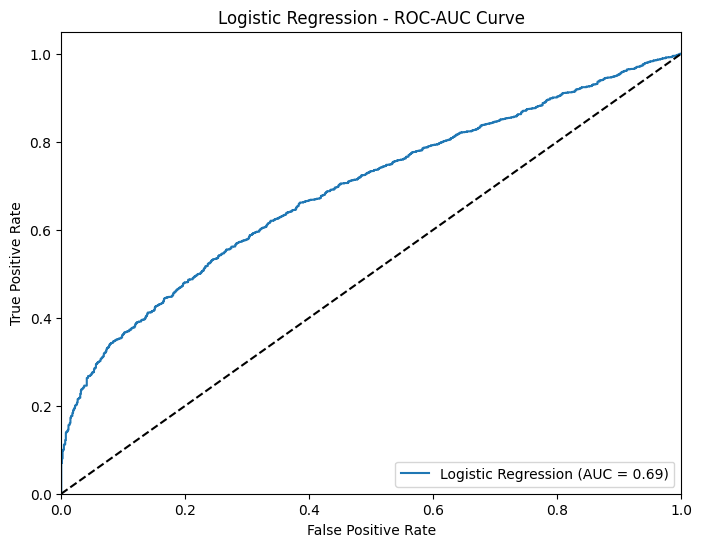

Random Forest Classification Report:
              precision    recall  f1-score   support

           0       0.52      0.43      0.47       948
           1       0.76      0.82      0.79      2052

    accuracy                           0.70      3000
   macro avg       0.64      0.62      0.63      3000
weighted avg       0.68      0.70      0.69      3000



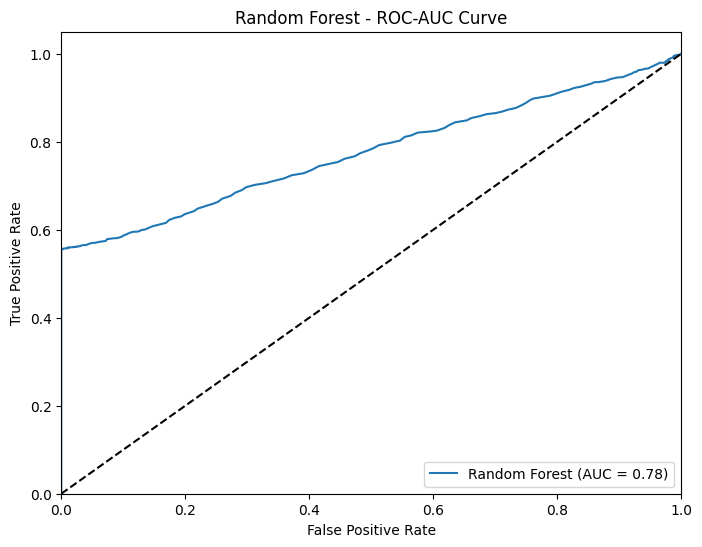

SVC Classification Report:
              precision    recall  f1-score   support

           0       0.48      0.17      0.25       948
           1       0.70      0.92      0.80      2052

    accuracy                           0.68      3000
   macro avg       0.59      0.54      0.52      3000
weighted avg       0.63      0.68      0.62      3000



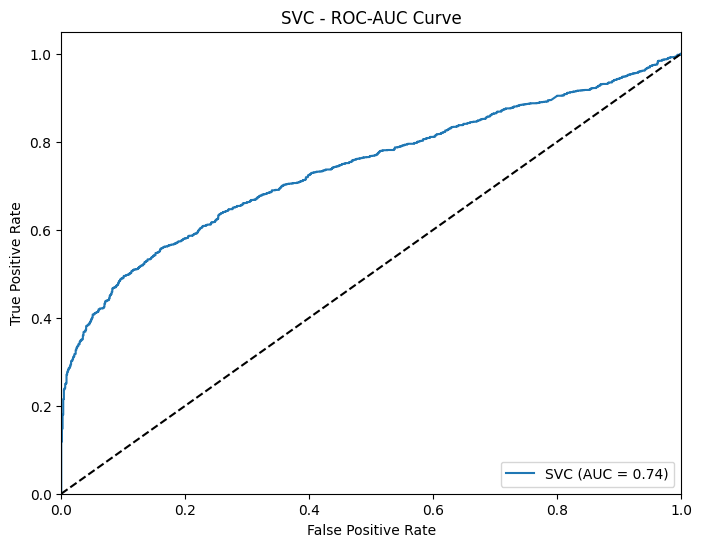

Decision Tree Classification Report:
              precision    recall  f1-score   support

           0       0.51      0.50      0.51       948
           1       0.77      0.78      0.78      2052

    accuracy                           0.69      3000
   macro avg       0.64      0.64      0.64      3000
weighted avg       0.69      0.69      0.69      3000



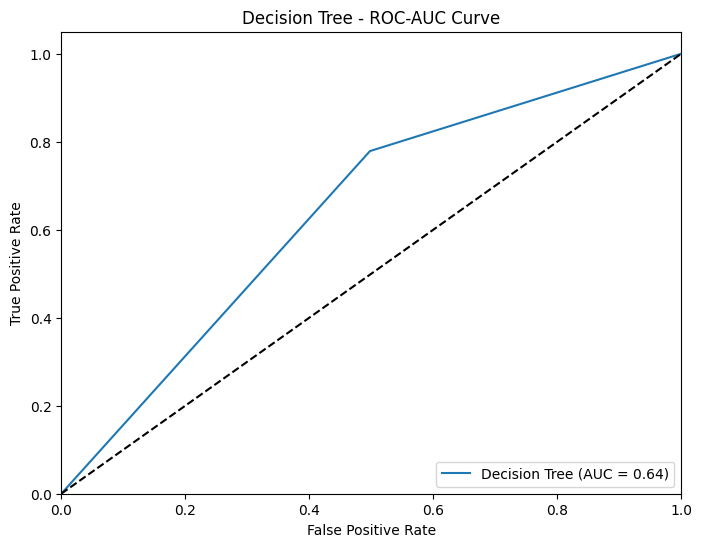

CatBoost Classification Report:
              precision    recall  f1-score   support

           0       0.50      0.48      0.49       948
           1       0.76      0.77      0.77      2052

    accuracy                           0.68      3000
   macro avg       0.63      0.63      0.63      3000
weighted avg       0.68      0.68      0.68      3000



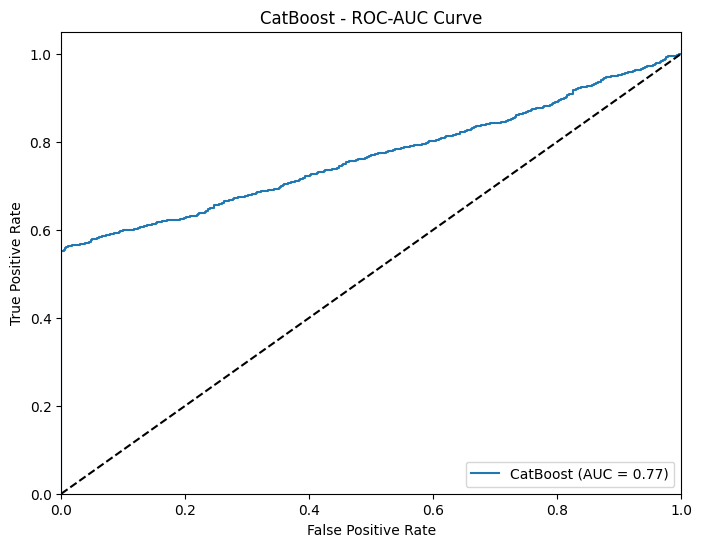

In [18]:
# Train and evaluate models for laptop
train_and_evaluate_laptop_models(laptop_df)

In [19]:
rf = RandomForestClassifier(random_state=42)
rf.fit(X_train_laptops, y_train_laptops)

rf_pred = rf.predict(X_test_laptops)
print(classification_report(y_test_laptops, rf_pred))

              precision    recall  f1-score   support

           0       0.51      0.45      0.48       948
           1       0.76      0.80      0.78      2052

    accuracy                           0.69      3000
   macro avg       0.63      0.62      0.63      3000
weighted avg       0.68      0.69      0.68      3000



In [20]:
catboost = CatBoostClassifier(random_state=42)
catboost.fit(X_train_laptops, y_train_laptops)

catboost_pred = catboost.predict(X_test_laptops)
print(classification_report(y_test_laptops, catboost_pred))

Learning rate set to 0.029768
0:	learn: 0.6710800	total: 16.4ms	remaining: 16.4s
1:	learn: 0.6506009	total: 33.9ms	remaining: 16.9s
2:	learn: 0.6308843	total: 50.5ms	remaining: 16.8s
3:	learn: 0.6113017	total: 65.4ms	remaining: 16.3s
4:	learn: 0.5978951	total: 80.6ms	remaining: 16s
5:	learn: 0.5805834	total: 95ms	remaining: 15.7s
6:	learn: 0.5716709	total: 126ms	remaining: 17.9s
7:	learn: 0.5566213	total: 153ms	remaining: 19s
8:	learn: 0.5426009	total: 181ms	remaining: 19.9s
9:	learn: 0.5339619	total: 202ms	remaining: 20s
10:	learn: 0.5262057	total: 225ms	remaining: 20.2s
11:	learn: 0.5171564	total: 245ms	remaining: 20.1s
12:	learn: 0.5102608	total: 262ms	remaining: 19.9s
13:	learn: 0.5029862	total: 279ms	remaining: 19.6s
14:	learn: 0.4973018	total: 297ms	remaining: 19.5s
15:	learn: 0.4917383	total: 312ms	remaining: 19.2s
16:	learn: 0.4887032	total: 329ms	remaining: 19s
17:	learn: 0.4843520	total: 348ms	remaining: 19s
18:	learn: 0.4810869	total: 364ms	remaining: 18.8s
19:	learn: 0.4775

In [21]:
# The best model is random forest classifier model
# Save the model to a file
joblib.dump(catboost, 'laptop_model.joblib')

['laptop_model.joblib']

In [22]:
# Train and test machine learning models for servers
def train_and_evaluate_server_models(df):
    X_train, X_test, y_train, y_test = preprocess_server_data(df)

    models = {
        "Logistic Regression": LogisticRegression(max_iter=1000),
        "Random Forest": RandomForestClassifier(n_estimators=100, random_state=42),
        "SVC": SVC(probability=True),
        "Decision Tree": DecisionTreeClassifier(random_state=42),
        "CatBoost": CatBoostClassifier(random_state=42, iterations=1000,verbose=False)
    }

    for model_name, model in models.items():
        model.fit(X_train, y_train)
        y_pred = model.predict(X_test)
        y_prob = model.predict_proba(X_test)[:, 1]

        # Classification Report
        print(f"{model_name} Classification Report:")
        print(classification_report(y_test, y_pred))

        # ROC-AUC Curve
        roc_auc = roc_auc_score(y_test, y_prob)
        fpr, tpr, _ = roc_curve(y_test, y_prob)

        plt.figure(figsize=(8, 6))
        plt.plot(fpr, tpr, label=f'{model_name} (AUC = {roc_auc:.2f})')
        plt.plot([0, 1], [0, 1], 'k--')
        plt.xlim([0.0, 1.0])
        plt.ylim([0.0, 1.05])
        plt.xlabel('False Positive Rate')
        plt.ylabel('True Positive Rate')
        plt.title(f'{model_name} - ROC-AUC Curve')
        plt.legend(loc='lower right')
        plt.show()

Logistic Regression Classification Report:
              precision    recall  f1-score   support

           0       0.75      0.68      0.72      1000
           1       0.85      0.89      0.87      2000

    accuracy                           0.82      3000
   macro avg       0.80      0.79      0.79      3000
weighted avg       0.82      0.82      0.82      3000



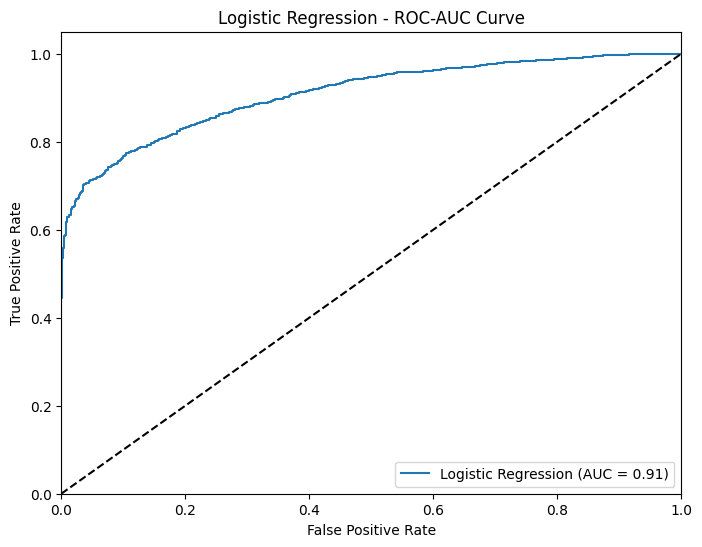

Random Forest Classification Report:
              precision    recall  f1-score   support

           0       1.00      1.00      1.00      1000
           1       1.00      1.00      1.00      2000

    accuracy                           1.00      3000
   macro avg       1.00      1.00      1.00      3000
weighted avg       1.00      1.00      1.00      3000



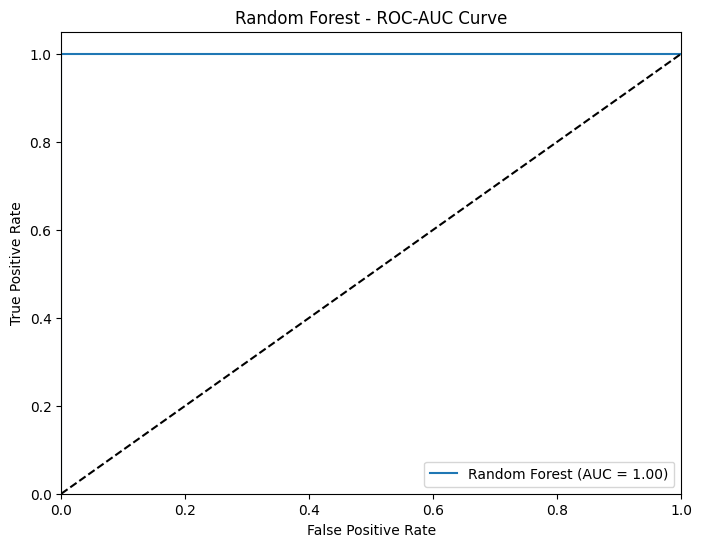

SVC Classification Report:
              precision    recall  f1-score   support

           0       0.91      0.87      0.89      1000
           1       0.94      0.96      0.95      2000

    accuracy                           0.93      3000
   macro avg       0.92      0.91      0.92      3000
weighted avg       0.93      0.93      0.93      3000



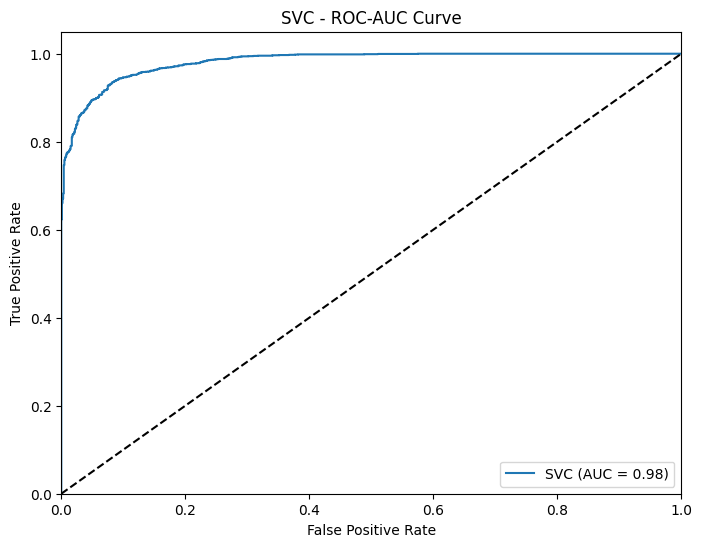

Decision Tree Classification Report:
              precision    recall  f1-score   support

           0       1.00      1.00      1.00      1000
           1       1.00      1.00      1.00      2000

    accuracy                           1.00      3000
   macro avg       1.00      1.00      1.00      3000
weighted avg       1.00      1.00      1.00      3000



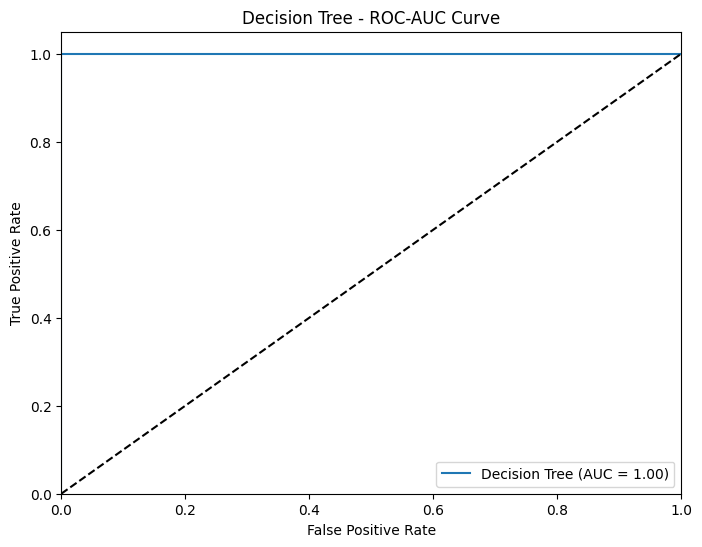

CatBoost Classification Report:
              precision    recall  f1-score   support

           0       1.00      1.00      1.00      1000
           1       1.00      1.00      1.00      2000

    accuracy                           1.00      3000
   macro avg       1.00      1.00      1.00      3000
weighted avg       1.00      1.00      1.00      3000



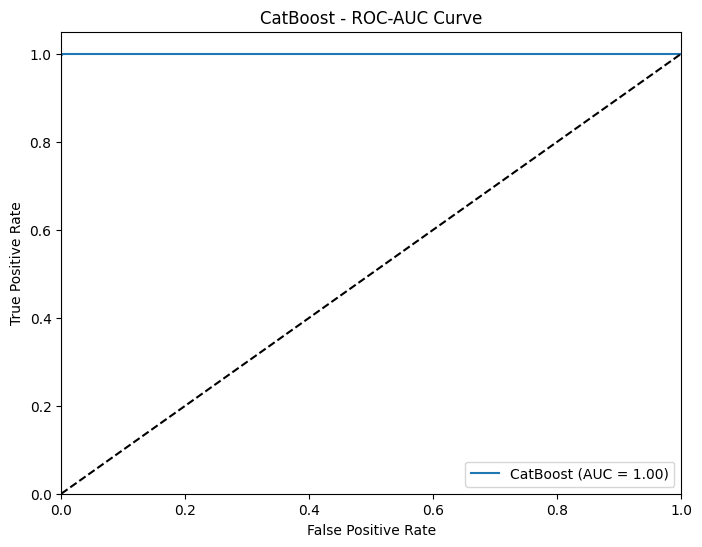

In [23]:
# Train and evaluate models for servers
train_and_evaluate_server_models(server_df)

In [24]:
rf_1 = RandomForestClassifier(n_estimators=500, random_state=42)
rf_1.fit(X_train_servers, y_train_servers)

rf_1_pred = rf_1.predict(X_test_servers)
print(classification_report(y_test_servers, rf_1_pred))

              precision    recall  f1-score   support

           0       1.00      1.00      1.00      1000
           1       1.00      1.00      1.00      2000

    accuracy                           1.00      3000
   macro avg       1.00      1.00      1.00      3000
weighted avg       1.00      1.00      1.00      3000



In [25]:
cat_1 = CatBoostClassifier(n_estimators=500, random_state=42, verbose=False)
cat_1.fit(X_train_servers, y_train_servers)

cat_1_pred = cat_1.predict(X_test_servers)
print(classification_report(y_test_servers, cat_1_pred))

              precision    recall  f1-score   support

           0       1.00      1.00      1.00      1000
           1       1.00      1.00      1.00      2000

    accuracy                           1.00      3000
   macro avg       1.00      1.00      1.00      3000
weighted avg       1.00      1.00      1.00      3000



In [26]:
# The best model is random forest classifier model
# Save the model to a file
joblib.dump(cat_1, 'server_model.joblib')

['server_model.joblib']